In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from scipy import misc

In [3]:
nfl_draft = pd.read_csv("nfl_draft_data.csv")

In [4]:
nfl_draft.head()

,DRAFT_YEAR,PLAYER,COLLEGE,POS,HEIGHT,WEIGHT,FORTY_YARD,BENCH_PRESS,VERTICAL_LEAP,BROAD_JUMP,SHUTTLE,THREE_CONE,POWER_FIVE,FIRST_ROUND_PICK
0,2017,John Johnson,Boston College,FS,72.63,208,4.61,14.0,37.0,119.0,4.18,6.72,1,0
1,2017,Matt Milano,Boston College,OLB,72.25,223,4.67,24.0,35.0,126.0,4.38,7.07,1,0
2,2016,Mehdi Abdesmad,Boston College,DT,78.25,284,5.10,25.0,29.5,108.0,4.62,7.55,1,0
3,2016,Steven Daniels,Boston College,ILB,71.50,243,4.86,16.0,32.0,112.0,4.54,7.33,1,0
4,2016,Justin Simmons,Boston College,FS,74.38,202,4.61,16.0,40.0,126.0,3.85,6.58,1,0


In [5]:
final_nfl_draft = nfl_draft.join((pd.get_dummies(nfl_draft['POS'])))
final_nfl_draft = final_nfl_draft.drop(['POS'],axis=1)

In [6]:
final_nfl_draft.head()

,DRAFT_YEAR,PLAYER,COLLEGE,HEIGHT,WEIGHT,FORTY_YARD,BENCH_PRESS,VERTICAL_LEAP,BROAD_JUMP,SHUTTLE,...,OG,OL,OLB,OT,P,QB,RB,SS,TE,WR
0,2017,John Johnson,Boston College,72.63,208,4.61,14.0,37.0,119.0,4.18,...,0,0,0,0,0,0,0,0,0,0
1,2017,Matt Milano,Boston College,72.25,223,4.67,24.0,35.0,126.0,4.38,...,0,0,1,0,0,0,0,0,0,0
2,2016,Mehdi Abdesmad,Boston College,78.25,284,5.10,25.0,29.5,108.0,4.62,...,0,0,0,0,0,0,0,0,0,0
3,2016,Steven Daniels,Boston College,71.50,243,4.86,16.0,32.0,112.0,4.54,...,0,0,0,0,0,0,0,0,0,0
4,2016,Justin Simmons,Boston College,74.38,202,4.61,16.0,40.0,126.0,3.85,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = final_nfl_draft.drop(['FIRST_ROUND_PICK','PLAYER','COLLEGE'], axis=1)
y = final_nfl_draft['FIRST_ROUND_PICK']

In [8]:
X.head()

,DRAFT_YEAR,HEIGHT,WEIGHT,FORTY_YARD,BENCH_PRESS,VERTICAL_LEAP,BROAD_JUMP,SHUTTLE,THREE_CONE,POWER_FIVE,...,OG,OL,OLB,OT,P,QB,RB,SS,TE,WR
0,2017,72.63,208,4.61,14.0,37.0,119.0,4.18,6.72,1,...,0,0,0,0,0,0,0,0,0,0
1,2017,72.25,223,4.67,24.0,35.0,126.0,4.38,7.07,1,...,0,0,1,0,0,0,0,0,0,0
2,2016,78.25,284,5.10,25.0,29.5,108.0,4.62,7.55,1,...,0,0,0,0,0,0,0,0,0,0
3,2016,71.50,243,4.86,16.0,32.0,112.0,4.54,7.33,1,...,0,0,0,0,0,0,0,0,0,0
4,2016,74.38,202,4.61,16.0,40.0,126.0,3.85,6.58,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size=.7)

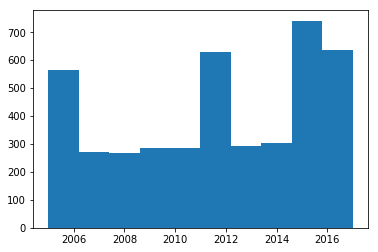

In [10]:
%matplotlib inline  
year_hist = plt.hist(X['DRAFT_YEAR'])


In [11]:
model = tree.DecisionTreeClassifier(max_depth=10)

In [12]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [13]:
y_pred =model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.8784235136940548

In [15]:
nfl_tree = open("./nfl_tree.dot", "w")
dot_data=tree.export_graphviz(model, out_file=nfl_tree)
nfl_tree.close()

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Ridge

In [17]:
train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1., 10), verbose=0)


In [18]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

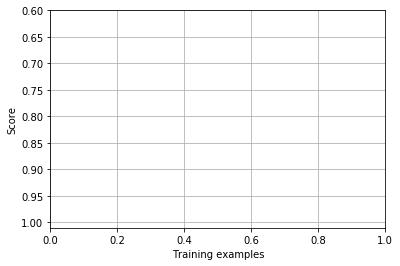

In [19]:
plt.figure()
plt.legend(loc="best")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.gca().invert_yaxis()
plt.grid()

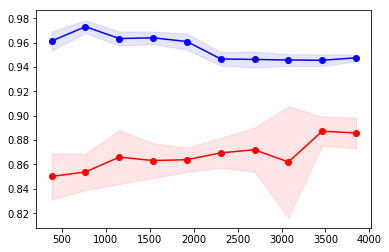

In [20]:
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")
plt.draw()
plt.show()
